In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.optimize import curve_fit

C:\Users\micha\AppData\Local\Temp\ipykernel_18540\991846175.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:

dfa = pd.read_csv("a.csv")
dfb = pd.read_csv("b.csv")
dfc = pd.read_csv("c.csv")


C:\Users\micha\AppData\Local\Temp\ipykernel_18540\2427511549.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv("a.csv")


Looking at the different data types of dfa, we can see that we need to convert "capacity", "deadweight", "availability", "operating_capacity" to integers

In [6]:
def clean_data():
    # getting rid of all whitespaces in the columns 
    columns_to_strip = ["snapshot_dt", "dep_stn", "arr_stn", "cabin", "class_code", "dep_dt", "pos", "capacity", "operating_capacity", "CAB_OR_CLS_CD"]

    for column in columns_to_strip:
        dfa[column] = dfa[column].str.strip()

    # converting the columns into ints
    columns_to_int = ["operating_capacity", "capacity", ]
    for column in columns_to_int:
        dfa[column] = pd.to_numeric(dfa[column], errors="coerce")

clean_data()

C:\Users\micha\AppData\Local\Temp\ipykernel_18540\2389303832.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


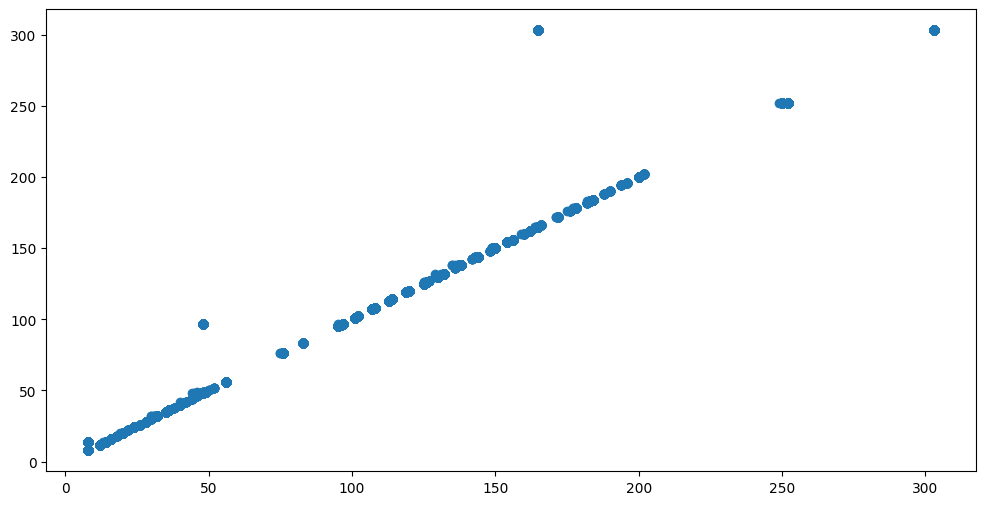

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(dfa.operating_capacity, dfa.capacity)
fig.show()

In [6]:
dfa.head()

,snapshot_dt,dep_stn,arr_stn,flt_no,cabin,class_code,dep_dt,pos,seats_sold,capacity,deadweight,operating_capacity,availability,CAB_OR_CLS_CD
0,2021-01-03,LCY,CGH,484,F,F,2021-12-24,GB,0,NaN,0,NaN,8,CLS
1,2021-01-03,LCY,CGH,484,F,F,2021-12-24,ROW,0,NaN,0,NaN,7,CLS
2,2021-01-03,LCY,CGH,484,F,F,2021-12-24,BR,0,NaN,0,NaN,8,CLS
3,2021-01-03,LCY,CGH,484,J,I,2021-12-24,GB,0,NaN,0,NaN,27,CLS
4,2021-01-03,LCY,CGH,484,J,I,2021-12-24,ROW,0,NaN,0,NaN,18,CLS


In [6]:
dfa.cov()

,flt_no,seats_sold,capacity,deadweight,availability,operating_capacity
flt_no,187194.479720,619.338694,335.061881,3.602237,-524.786644,325.310583
seats_sold,619.338694,692.033057,1284.593210,0.253475,-19.180720,1288.925282
capacity,335.061881,1284.593210,4224.129409,64.317240,2875.218960,4159.812170
deadweight,3.602237,0.253475,64.317240,14.909551,10.567531,21.789331
availability,-524.786644,-19.180720,2875.218960,10.567531,2467.251971,2849.097557
operating_capacity,325.310583,1288.925282,4159.812170,21.789331,2849.097557,4138.022839


As it can be seen, there is a large correlation for it to be statistically significant enough for the pairs (seats_sold, capacity), (availability, capacity), (seats_sold, operating_capacity), (capacity, operating_capacity), and others for there to be a linear relationship

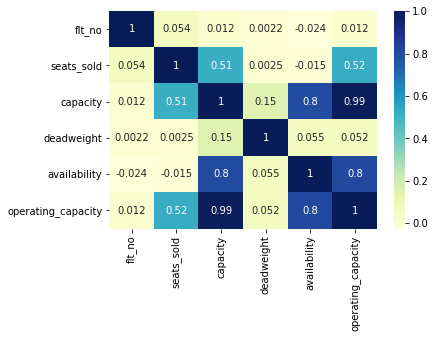

In [11]:
dataplot = sb.heatmap(dfa.corr(), cmap = "YlGnBu", annot=True)
plt.show()

### Plotting lines of best fit

In [8]:
def linear_model(x, a, b):
    return a*x + b

temp_dfa = dfa.replace([np.inf, -np.inf], np.nan).dropna(subset=['seats_sold', 'capacity'])

popt, pcov = curve_fit(linear_model, temp_dfa["seats_sold"], temp_dfa["capacity"])

new_y = linear_model(temp_dfa["seats_sold"], *popt)



c:\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


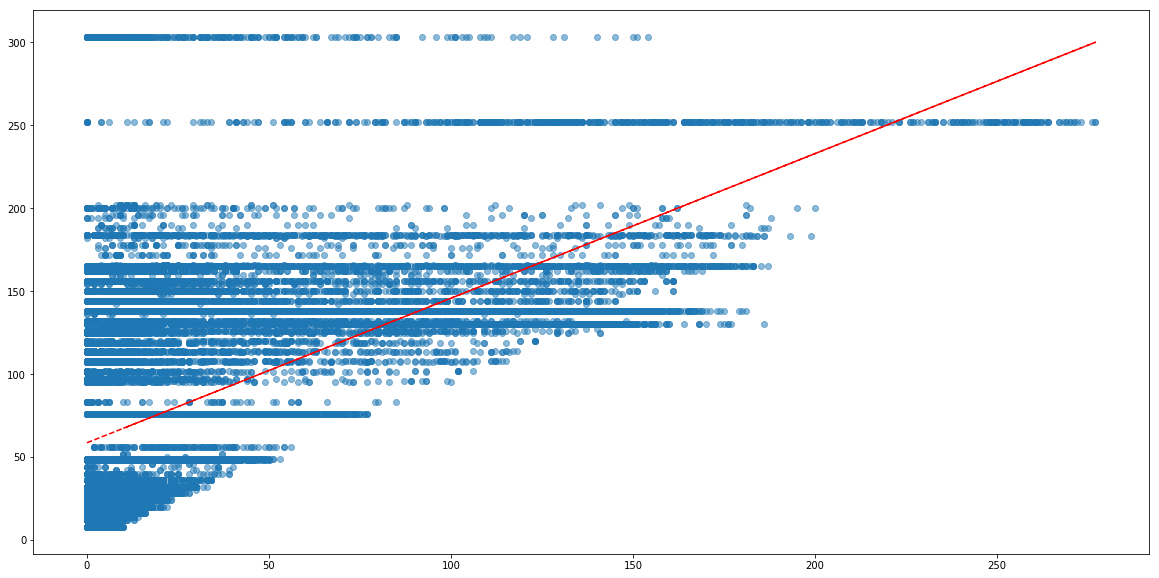

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(temp_dfa["seats_sold"], new_y, "--", color="red")
ax.scatter(temp_dfa["seats_sold"], temp_dfa["capacity"], alpha=0.5)
fig.show()

In [12]:
dfa.dtypes

snapshot_dt            object
dep_stn                object
arr_stn                object
flt_no                  int64
cabin                  object
class_code             object
dep_dt                 object
pos                    object
seats_sold              int64
capacity              float64
deadweight              int64
availability            int64
operating_capacity    float64
CAB_OR_CLS_CD          object
dtype: object

### Exploring the cabing and class columns

In [25]:
dfa.loc[dfa.CAB_OR_CLS_CD=="CAB", ["cabin", "class_code", "CAB_OR_CLS_CD"]].head()

,cabin,class_code,CAB_OR_CLS_CD
1120392,M,M,CAB
1120393,J,J,CAB
1120394,C,J,CAB
1120395,M,M,CAB
1120396,C,J,CAB


In [24]:
dfa.loc[dfa.CAB_OR_CLS_CD!="CAB", ["cabin", "class_code", "CAB_OR_CLS_CD"]].head()

,cabin,class_code,CAB_OR_CLS_CD
0,F,F,None
1,F,F,None
2,F,F,None
3,J,I,None
4,J,I,None


In [23]:
print(dfa.cabin.unique())
print(dfa.class_code.unique())

['F' 'J' 'M' 'C']
['F' 'I' 'J' 'B' 'M' 'O' 'E' 'T' 'W']


In [46]:
print(dfa[dfa["cabin"]=="F"]["class_code"].value_counts())
print(len(dfa[dfa["cabin"]=="F"]))

F    188791
Name: class_code, dtype: int64
188791


In [53]:
print(dfa[dfa["cabin"]=="J"]["class_code"].value_counts())
print(len(dfa[dfa["cabin"]=="J"]))

J    214604
I     82653
Name: class_code, dtype: int64
297257


In [52]:
print(dfa[dfa["cabin"]=="M"]["class_code"].value_counts())
print(len(dfa[dfa["cabin"]=="M"]))

M    464824
O    182940
B    182940
T     33429
W     33429
E     33429
Name: class_code, dtype: int64
930991


In [51]:
print(dfa[dfa["cabin"]=="C"]["class_code"].value_counts())
print(len(dfa[dfa["cabin"]=="C"]))

J    250220
I    100287
F     33429
Name: class_code, dtype: int64
383936


In [12]:
dfb.columns

Index(['snapshot_dt', 'dep_stn', 'arr_stn', 'flt_no', 'dep_dt', 'unit_cd',
       'cabin', 'loc', 'STN_POC_CD', 'lop'],
      dtype='object')

In [13]:
df_fit_cabin = dfa[(dfa["CAB_OR_CLS_CD"] == 'CAB') & 
                   (dfa["dep_stn"] == 'LCY') &
                   dfa["arr_stn"] == 'VCE' &
                   dfa["flt_no"] == 1472 &
                   dfa["dep_dt"] == '2021-12-28' & 
                   dfa["cabin"] == 'M']

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dfa["snapshot_dt"], dfa["seats_sold"])

Error in callback <function _draw_all_if_interactive at 0x00000199D96579C0> (for post_execute), with arguments args (),kwargs {}:


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x600 with 1 Axes>

In [9]:
dfa.columns

Index(['snapshot_dt', 'dep_stn', 'arr_stn', 'flt_no', 'cabin', 'class_code',
       'dep_dt', 'pos', 'seats_sold', 'capacity', 'deadweight',
       'operating_capacity', 'availability', 'CAB_OR_CLS_CD'],
      dtype='object')